<a href="https://colab.research.google.com/github/jojosam90/recommeded_system/blob/main/movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
# from google.colab import drive
# drive.mount('/content/drive')

## Movie Recommendation

# Types of recommendation system 

- Popularity Based
  It keeps a track of view counts for each movie/video and then lists movies based on views in descending order.

- Content Based
  Is takes a movie that user currently likes an input. Then it analyses the contents of the movie to find out other moveis which have similiar content. Then it ranks similiar movies according their similiarity score and recommends the most relevant to the user.

- Collaborative filtering
  The recommendations get filtered based on the collaboration between similiar user's preferences.

# In this case going to implement content based recommendation system.

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [323]:
movies=pd.read_csv('/content/drive/MyDrive/dataset/recommendation_system/movie/movies.csv')
ratings=pd.read_csv('/content/drive/MyDrive/dataset/recommendation_system/movie/ratings.csv')

In [324]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [325]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [326]:
movies.shape

(10329, 3)

In [327]:
ratings.shape

(105339, 4)

In [328]:
movies.describe()

,movieId
count,10329.0000
mean,31924.2829
std,37734.7411
min,1.0000
25%,3240.0000
50%,7088.0000
75%,59900.0000
max,149532.0000


In [329]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.0000,105339.0000,105339.0000,105339.0000
mean,364.9245,13381.3125,3.5169,1130423971.9743
std,197.4869,26170.4569,1.0449,180266031.9411
min,1.0000,1.0000,0.5000,828564954.0000
25%,192.0000,1073.0000,3.0000,971100797.5000
50%,383.0000,2497.0000,3.5000,1115154056.0000
75%,557.0000,5991.0000,4.0000,1275495998.5000
max,668.0000,149532.0000,5.0000,1452404919.0000


In [330]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title) 

In [331]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0000,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5000,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0000,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0000,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0000,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [332]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0000
Pulp Fiction (1994),1352.0000
Forrest Gump (1994),1287.0000
"Silence of the Lambs, The (1991)",1216.5000
Star Wars: Episode IV - A New Hope (1977),1143.5000


<BarContainer object of 20 artists>

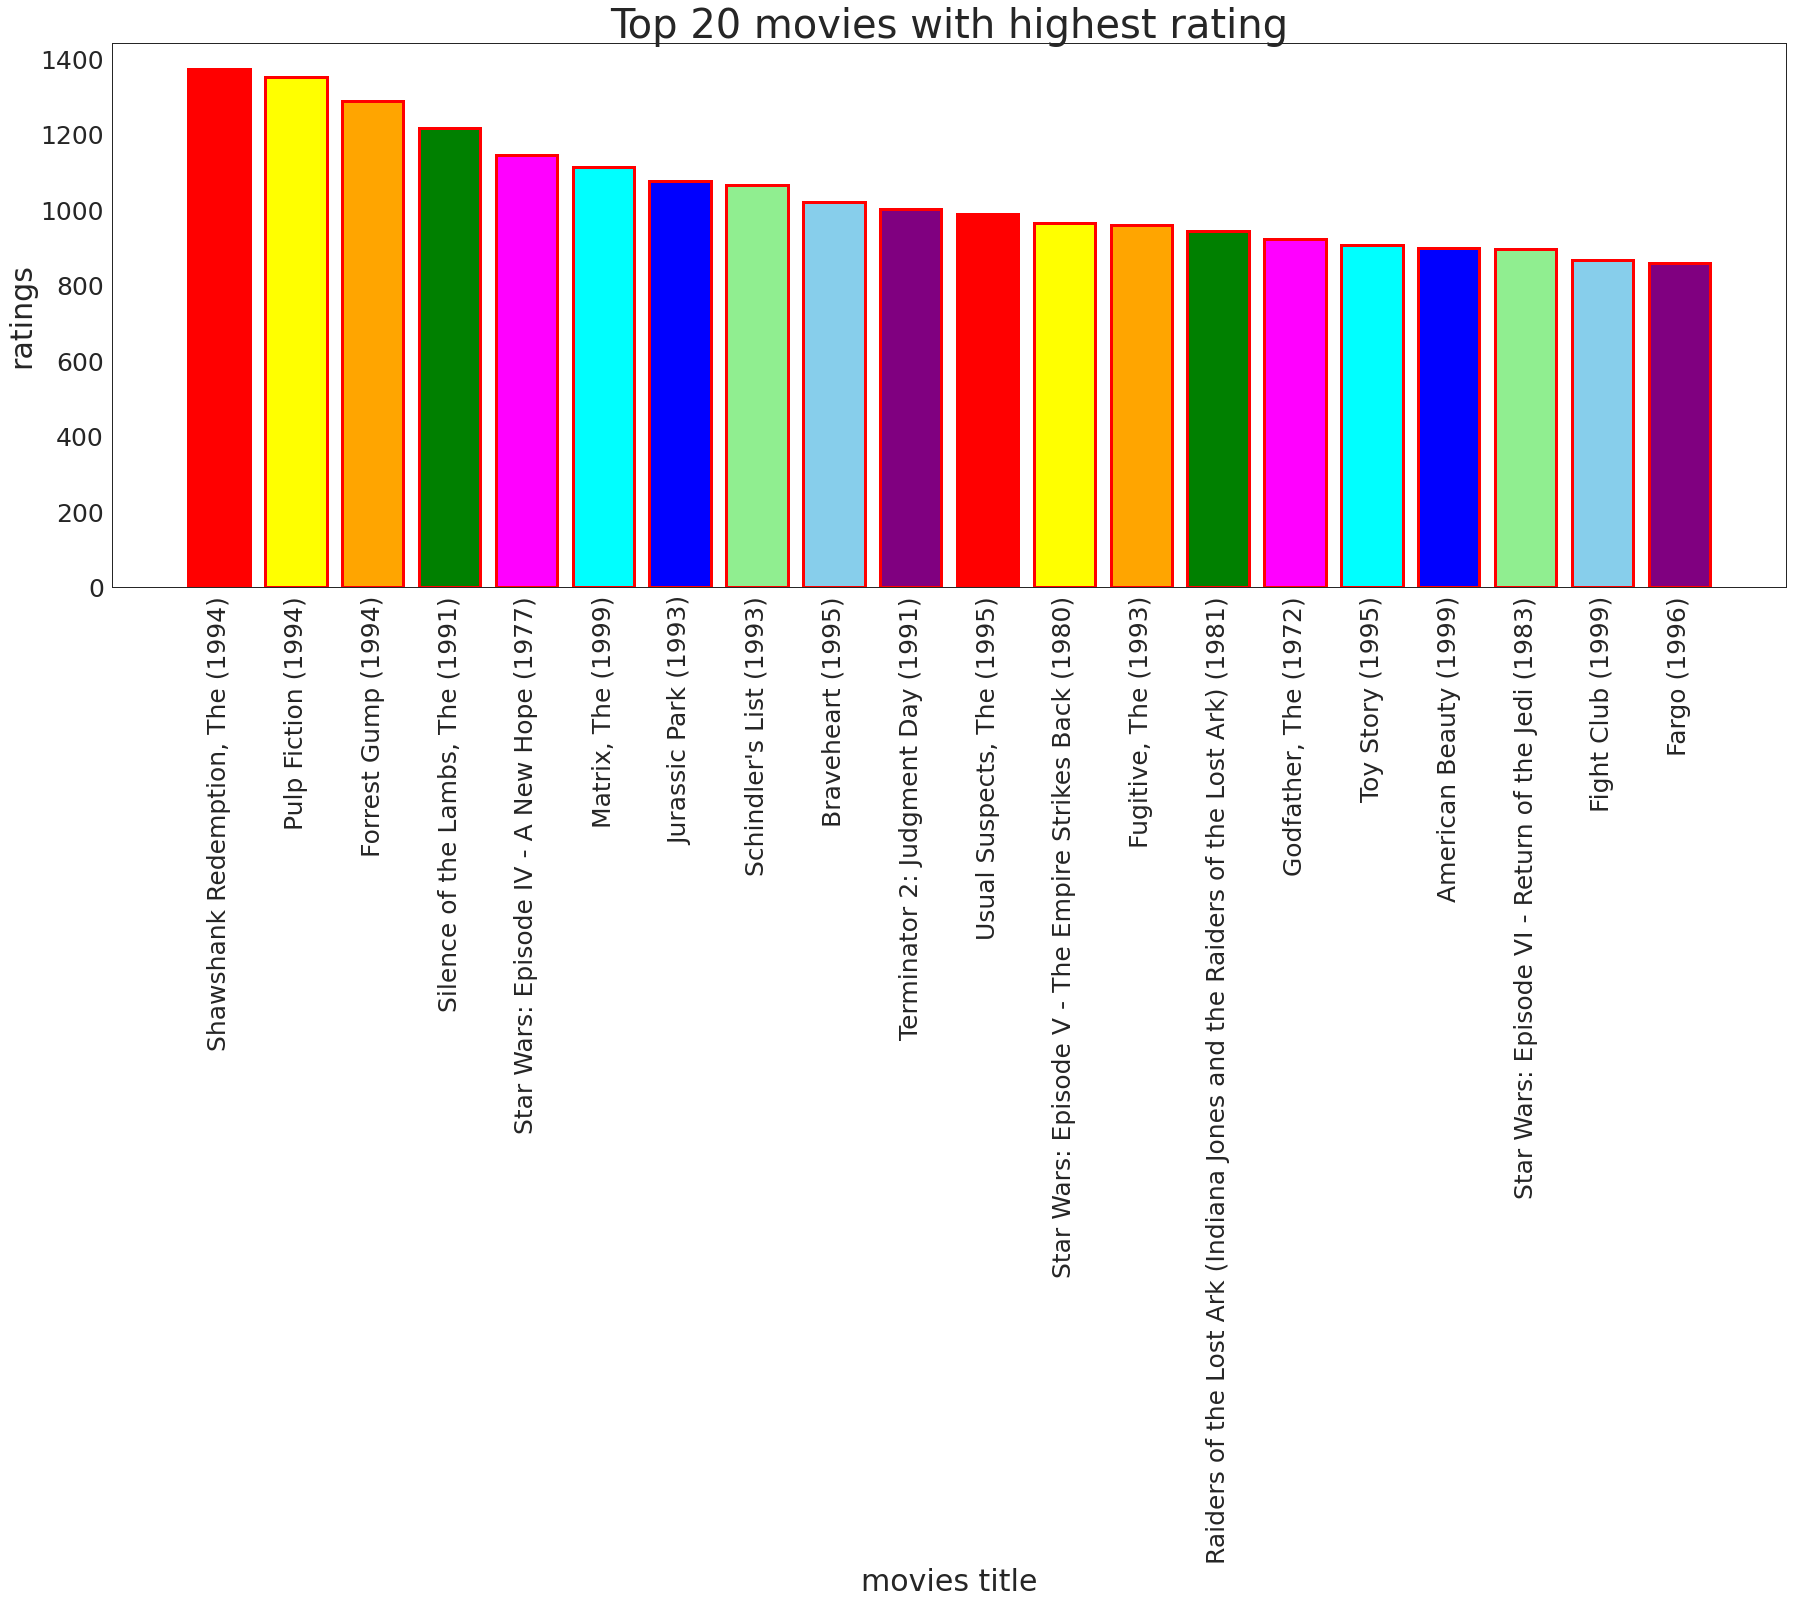

In [333]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [334]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

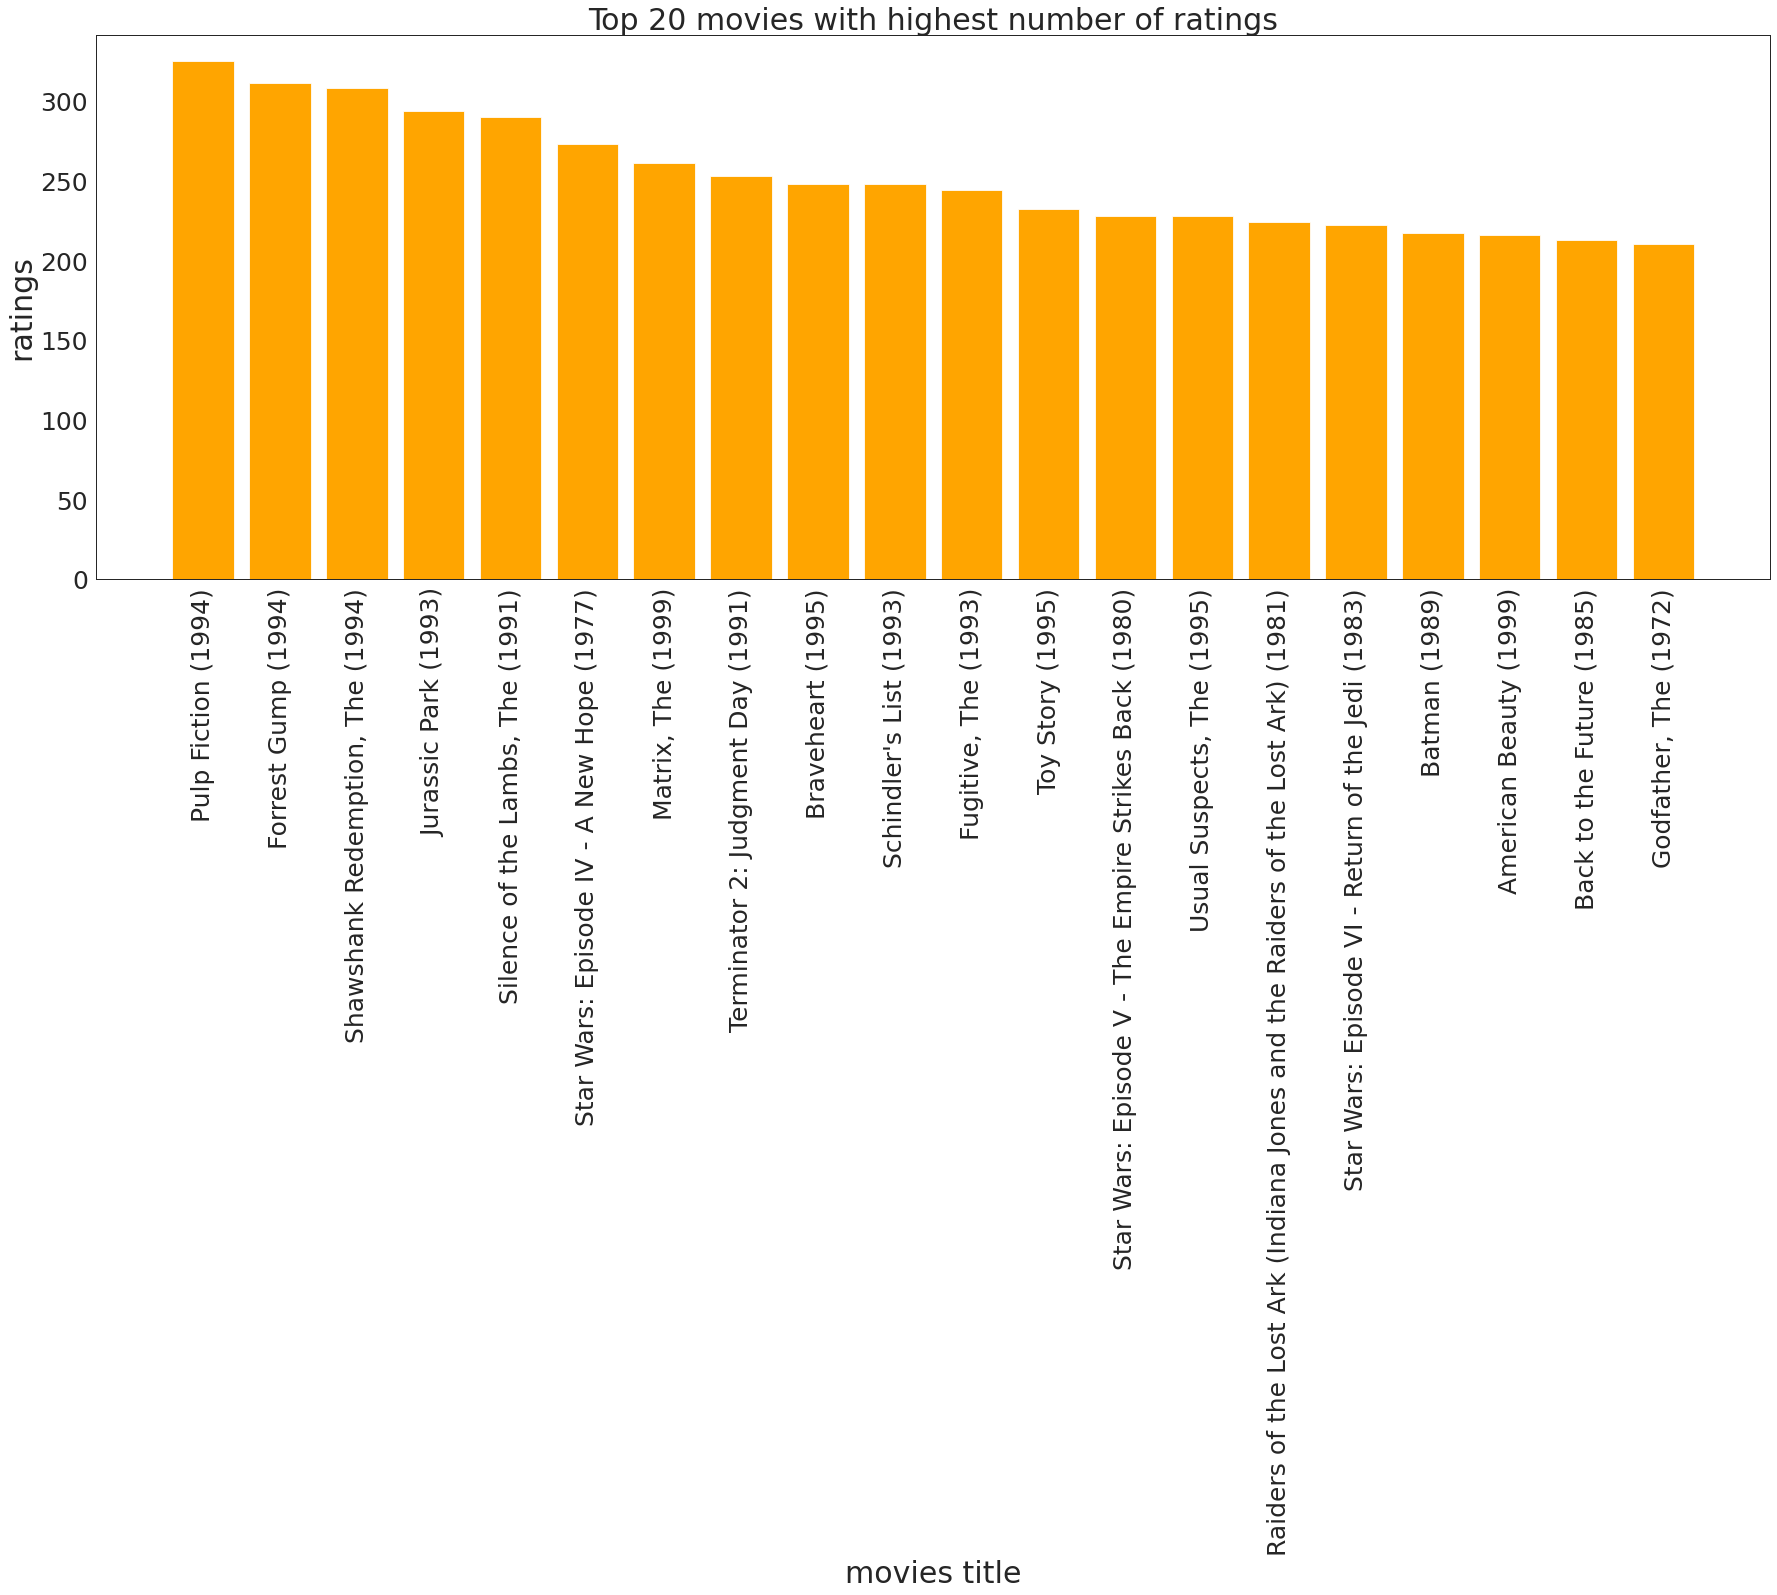

In [335]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='orange')

In [336]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [338]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [339]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [340]:
recommendations('Toy Story (1995)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198